# SUPERNOVA NEUTRINO DETECTION

The first step is to create our supernova, which will be done simply by determining the neutrino spectrum emitted by the supernova process. The neutrino emission spectrum follows an equation of the type

$$ \frac{dN}{dE} = A \frac{E^2}{1+e^{x - \eta}}$$

where $x = E/kT$ and $A= E_{tot}/T^4 f^3$, being $T$ the neutrino emission temperature, $E_{tot}$ is the total energy emitted by the supernova, $\eta$ is the neutrino degeneracy, which is equivalent to chemical potential in thermodynamics, finally $f^3$ is the Fermi's integral of 3rd order.

Let's start our detection by calling useful packages and defining the spectrum, for convinience let us choose $E_{tot} = 100$, $T=5$, $\eta = 1$ and $f = 0.6$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.special import gamma
from scipy import stats
from random import choices
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
url = 'https://raw.githubusercontent.com/PedroHPCintra/TCC/master/DadosSupernovaMonteCarlo.csv'

data = pd.read_csv(url)
data.head(5)

,Simulação 1,Unnamed: 1,Simulação 2,Unnamed: 3,Referências
0,E,dNdE,E,dNdE,"AKAZATO, K. et al. Supernova neutrino light cu..."
1,0,7.961524e+53,1.22,1.24e+53,"KEIL, M. T.; RAFFELT, G. G.; JANKA, H.-T. Mont..."
2,1,6.156184e+54,1.92,2.74e+53,NaN
3,2.5,2.171815e+55,2.74,4.80e+53,NaN
4,4.5,4.897389e+55,3.34,6.54e+53,NaN


In [3]:
data = np.asarray(data)

In [4]:
data[:,0]

array(['E', '0', '1', '2.5', '4.5', '7', '10', '14', '19', '25', '32',
       '40', '48', '58', '68', '80', '95', '115', '145', '185', '235',
       nan, nan, nan, nan, nan, nan, nan], dtype=object)

In [5]:
data_E = data[1:21,0]
data_dNdE = data[1:21,1]

In [6]:
E_data = []
dNdE_data = []
for i in range(len(data_E)):
    E_data.append(float(data_E[i]))
    
for i in range(len(data_dNdE)):
    dNdE_data.append(float(data_dNdE[i]))

In [7]:
E_data = np.array(E_data)
dNdE_data = np.array(dNdE_data)

In [8]:
E_data

array([  0. ,   1. ,   2.5,   4.5,   7. ,  10. ,  14. ,  19. ,  25. ,
        32. ,  40. ,  48. ,  58. ,  68. ,  80. ,  95. , 115. , 145. ,
       185. , 235. ])

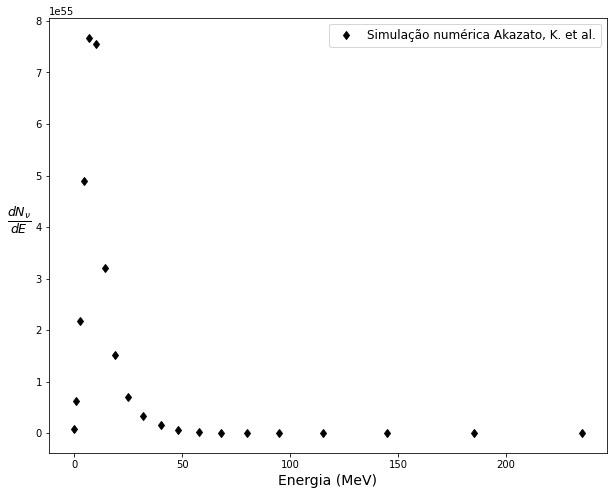

In [9]:
plt.figure(figsize=(10,8))
plt.plot(E_data, dNdE_data, 'kd', label = 'Simulação numérica Akazato, K. et al.')
plt.xlabel('Energia (MeV)', fontsize = 14)
plt.ylabel(r'$\frac{dN_\nu}{dE}$', rotation = 0, labelpad = 16, fontsize = 18)
plt.legend(loc='upper right', fontsize = 12)

In [10]:
E = np.linspace(0, 250, 1000)


def specNO(E, Etot, T, a):
    fermi = 1
#    Etot = 1e53
    A = Etot/((T**4)*fermi**3)
    k = 1
    return A*(((E**2)*np.exp(-a*(E/(k*T))**2))/(1 + np.exp(E/(k*T))))

def specJH(E, Etot, T, eta):
    fermi = 1
#    Etot = 1e53
    A = Etot/((T**4)*fermi**3)
    k = 1
    return A*((E**2)/(1 + np.exp(E/(k*T)-eta)))

In [11]:
initialParameters = np.array([1e53, 1, 1])

c, cov = curve_fit(specJH, E_data, dNdE_data, initialParameters)
c2, cov2 = curve_fit(specNO, E_data, dNdE_data, initialParameters)

specJHopt = specJH(E, c[0], c[1], c[2])
specNOopt = specNO(E, c2[0], c2[1], c2[2])

print('R^2 test JH:', r2_score(specJH(E_data, c[0], c[1], c[2]), dNdE_data))
print('R^2 test NO:', r2_score(specNO(E_data, c2[0], c2[1], c2[2]), dNdE_data))

R^2 test JH: 0.9907596689419055
R^2 test NO: 0.9869640287565601


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':


Text(0.5, 1.0, 'Espectro de emissão de neutrinos na supernova')

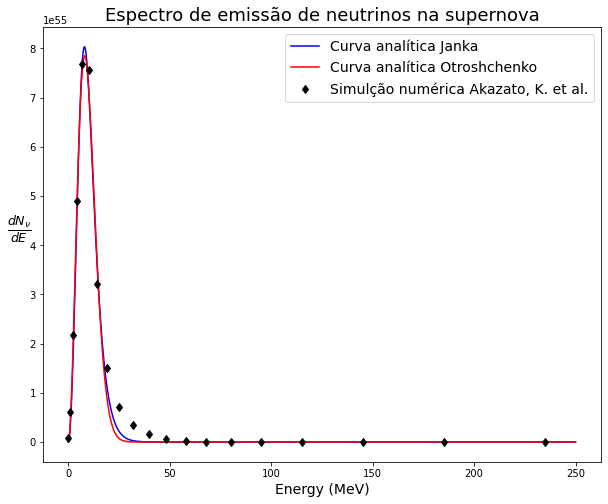

In [12]:
plt.figure(figsize=(10,8))
plt.plot(E, specJHopt, color = 'blue', label = 'Curva analítica Janka')
plt.plot(E, specNOopt, color = 'red', label = 'Curva analítica Otroshchenko')
plt.plot(E_data, dNdE_data, 'kd', label = 'Simulção numérica Akazato, K. et al.')
plt.xlabel('Energy (MeV)', fontsize = 14)
plt.ylabel(r'$\frac{d N_\nu}{dE}$', rotation = 0, fontsize = 18, labelpad=10)
plt.legend(loc = 'upper right', fontsize = 14)
plt.title('Espectro de emissão de neutrinos na supernova', fontsize = 18)

In [13]:
data_E_2 = data[1:30,2]
data_dNdE_2 = data[1:30,3]

In [14]:
E2_data = []
dNdE2_data = []
for i in range(len(data_E_2)):
    E2_data.append(float(data_E_2[i]))
    
for i in range(len(data_dNdE_2)):
    dNdE2_data.append(float(data_dNdE_2[i]))

In [15]:
E2_data = np.array(E2_data)
dNdE2_data = np.array(dNdE2_data)

In [16]:
E2 = np.linspace(0,50,500)

initialParameters = np.array([1e53, 1, 1])

c3, cov3 = curve_fit(specJH, E2_data, dNdE2_data, initialParameters)
c4, cov4 = curve_fit(specNO, E2_data, dNdE2_data, initialParameters)

specJHopt = specJH(E2, c3[0], c3[1], c3[2])
specNOopt = specNO(E2, c4[0], c4[1], c4[2])

print('R^2 test JH:', r2_score(specJH(E2_data, c3[0], c3[1], c3[2]), dNdE2_data))
print('R^2 test NO:', r2_score(specNO(E2_data, c4[0], c4[1], c4[2]), dNdE2_data))

R^2 test JH: 0.9990181451877618
R^2 test NO: 0.9997036717507727


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':


Text(0.5, 1.0, 'Espectro de emissão de neutrinos na supernova')

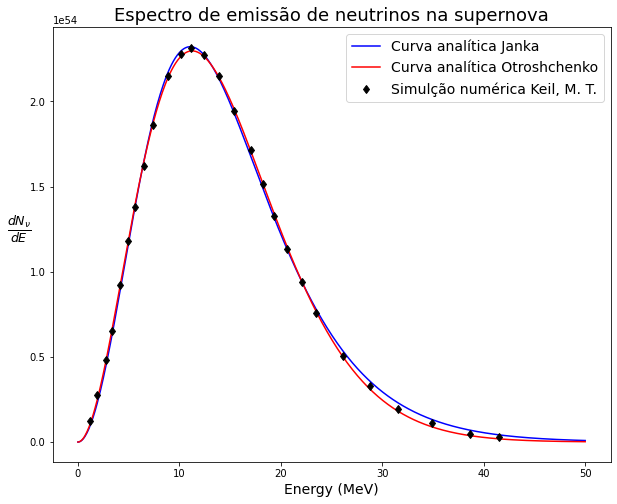

In [17]:
plt.figure(figsize=(10,8))
plt.plot(E2, specJHopt, color = 'blue', label = 'Curva analítica Janka')
plt.plot(E2, specNOopt, color = 'red', label = 'Curva analítica Otroshchenko')
plt.plot(E2_data, dNdE2_data, 'kd', label = 'Simulção numérica Keil, M. T.')
plt.xlabel('Energy (MeV)', fontsize = 14)
plt.ylabel(r'$\frac{d N_\nu}{dE}$', rotation = 0, fontsize = 18, labelpad=10)
plt.legend(loc = 'upper right', fontsize = 14)
plt.title('Espectro de emissão de neutrinos na supernova', fontsize = 18)

$$ \frac{E_{tot}}{T^4 f^{(3)}} \frac{1}{1 + e^{E/kT - \eta}} $$

In [2]:
#Here we define the range of variation for the energy E in MeVs

E = np.linspace(0.001, 70, 1000)

#Here we now define the "spec" function, representing the supernova spectrum

def spec(E, T, eta):
    fermi3 = 1
    Etot = 1e53
    A = Etot/((T**4)*fermi3)
    k = 9.617e-2
    return A*((E**2)/(1 + np.exp(E/(k*T)-eta)))

#An interesting thing to do, is to calculate the total number of neutrinos emitted in this process, given by
#the integral of spec over all energies

tot = simps(spec(E, 30, 3), E)
print('Total number of neutrinos emitted: ', tot)

Total number of neutrinos emitted:  5.623829586398771e+49


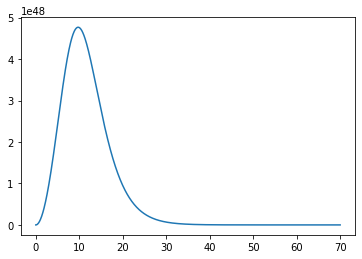

In [3]:
plt.plot(E, spec(E, 30, 3))

Nice, now we proceed to create our detection spectrum, which is given by the multiplication of the supernova spectrum $dN/dE$ by the interaction cross-section of our detector $\sigma(E)$ and the efficiency $\varepsilon (E)$.

In [4]:
def sigma(E, th, g1, g2):
    m_e = 0.511
    sigma_0 = 88.06e-46
    Tmax = (2*E**2)/(m_e + 2*E)
    return (sigma_0/m_e)*((g1**2 + g2**2)*(Tmax-th)-(g2**2 + g1*g2*(m_e/(2*E)))*((Tmax**2 - th**2)/E) + 
                         ((g2**2)/3)*((Tmax**3 - th**3)/E))

In [5]:
def detec(E, T, eta):
    epsilon = 1/(1+np.exp(-5*(E-5))) #Detector efficiency
    Nt = 1e10 #Number of target particles in the detector
    d = 50*10**3 #Distance from supernova to the detector
    D = Nt/(4*np.pi*d**2)
    return spec(E, T, eta)*sigma(E, 0, 1/2, 1/2)*epsilon*D

#It is useful to compute the total number of detected neutrinos, given by the integral of our "detec" function
#multiplied by a constant (D) that represents the homogeneous spread of neutrinos all over space, that is why
#we added it to the "detec" function already, but again, for simplicity we choose not to use it

s0 = simps(detec(E, 30, 3), E)
print('Expected events in the detector = %3.f' % s0)

Expected events in the detector = 4709643


How about a plot of this spectrum for a better look?

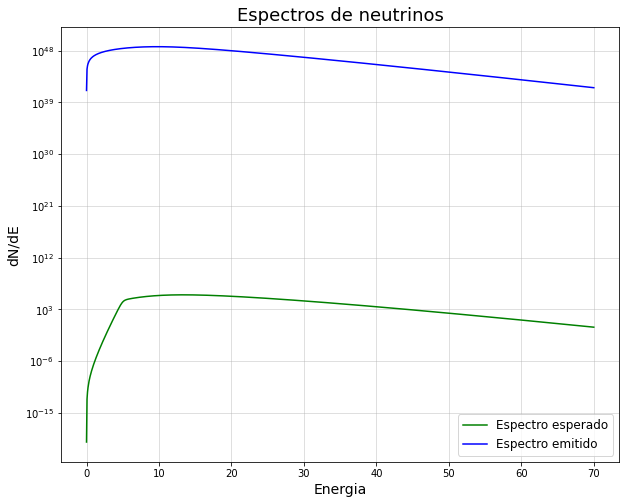

In [6]:
plt.figure(figsize=(10,8))
plt.grid(True, which = 'both', alpha = 0.5)
plt.plot(E, detec(E, 30, 3), color = 'green', label = 'Espectro esperado')
plt.plot(E, spec(E, 30, 3), color = 'blue', label = 'Espectro emitido')
plt.xlabel('Energia', fontsize = 14)
plt.ylabel('dN/dE', fontsize = 14)
plt.yscale('log')
plt.title('Espectros de neutrinos', fontsize = 18)
plt.legend(fontsize = 12)

Sweet, we expect to detect 401 neutrinos in our detector. All of that seems wonderful, but the real world is not so organized and we must introduce a random fluctuations in our detection. That shall be acomplished by creating a poisson distribution centered at $s_0$, we then pick a random number from this distribution and assign it as our new number of detected neutrinos

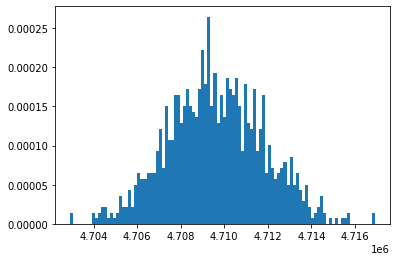

Number chosen = 4711252


In [7]:
poiss = np.random.poisson(s0, 1000)
count, bins, ignored = plt.hist(poiss, 100, density=True)
plt.show()
print('Number chosen = %3.f' % poiss[0])

#Lets make it our reference for all future analysis
ref = poiss[0]

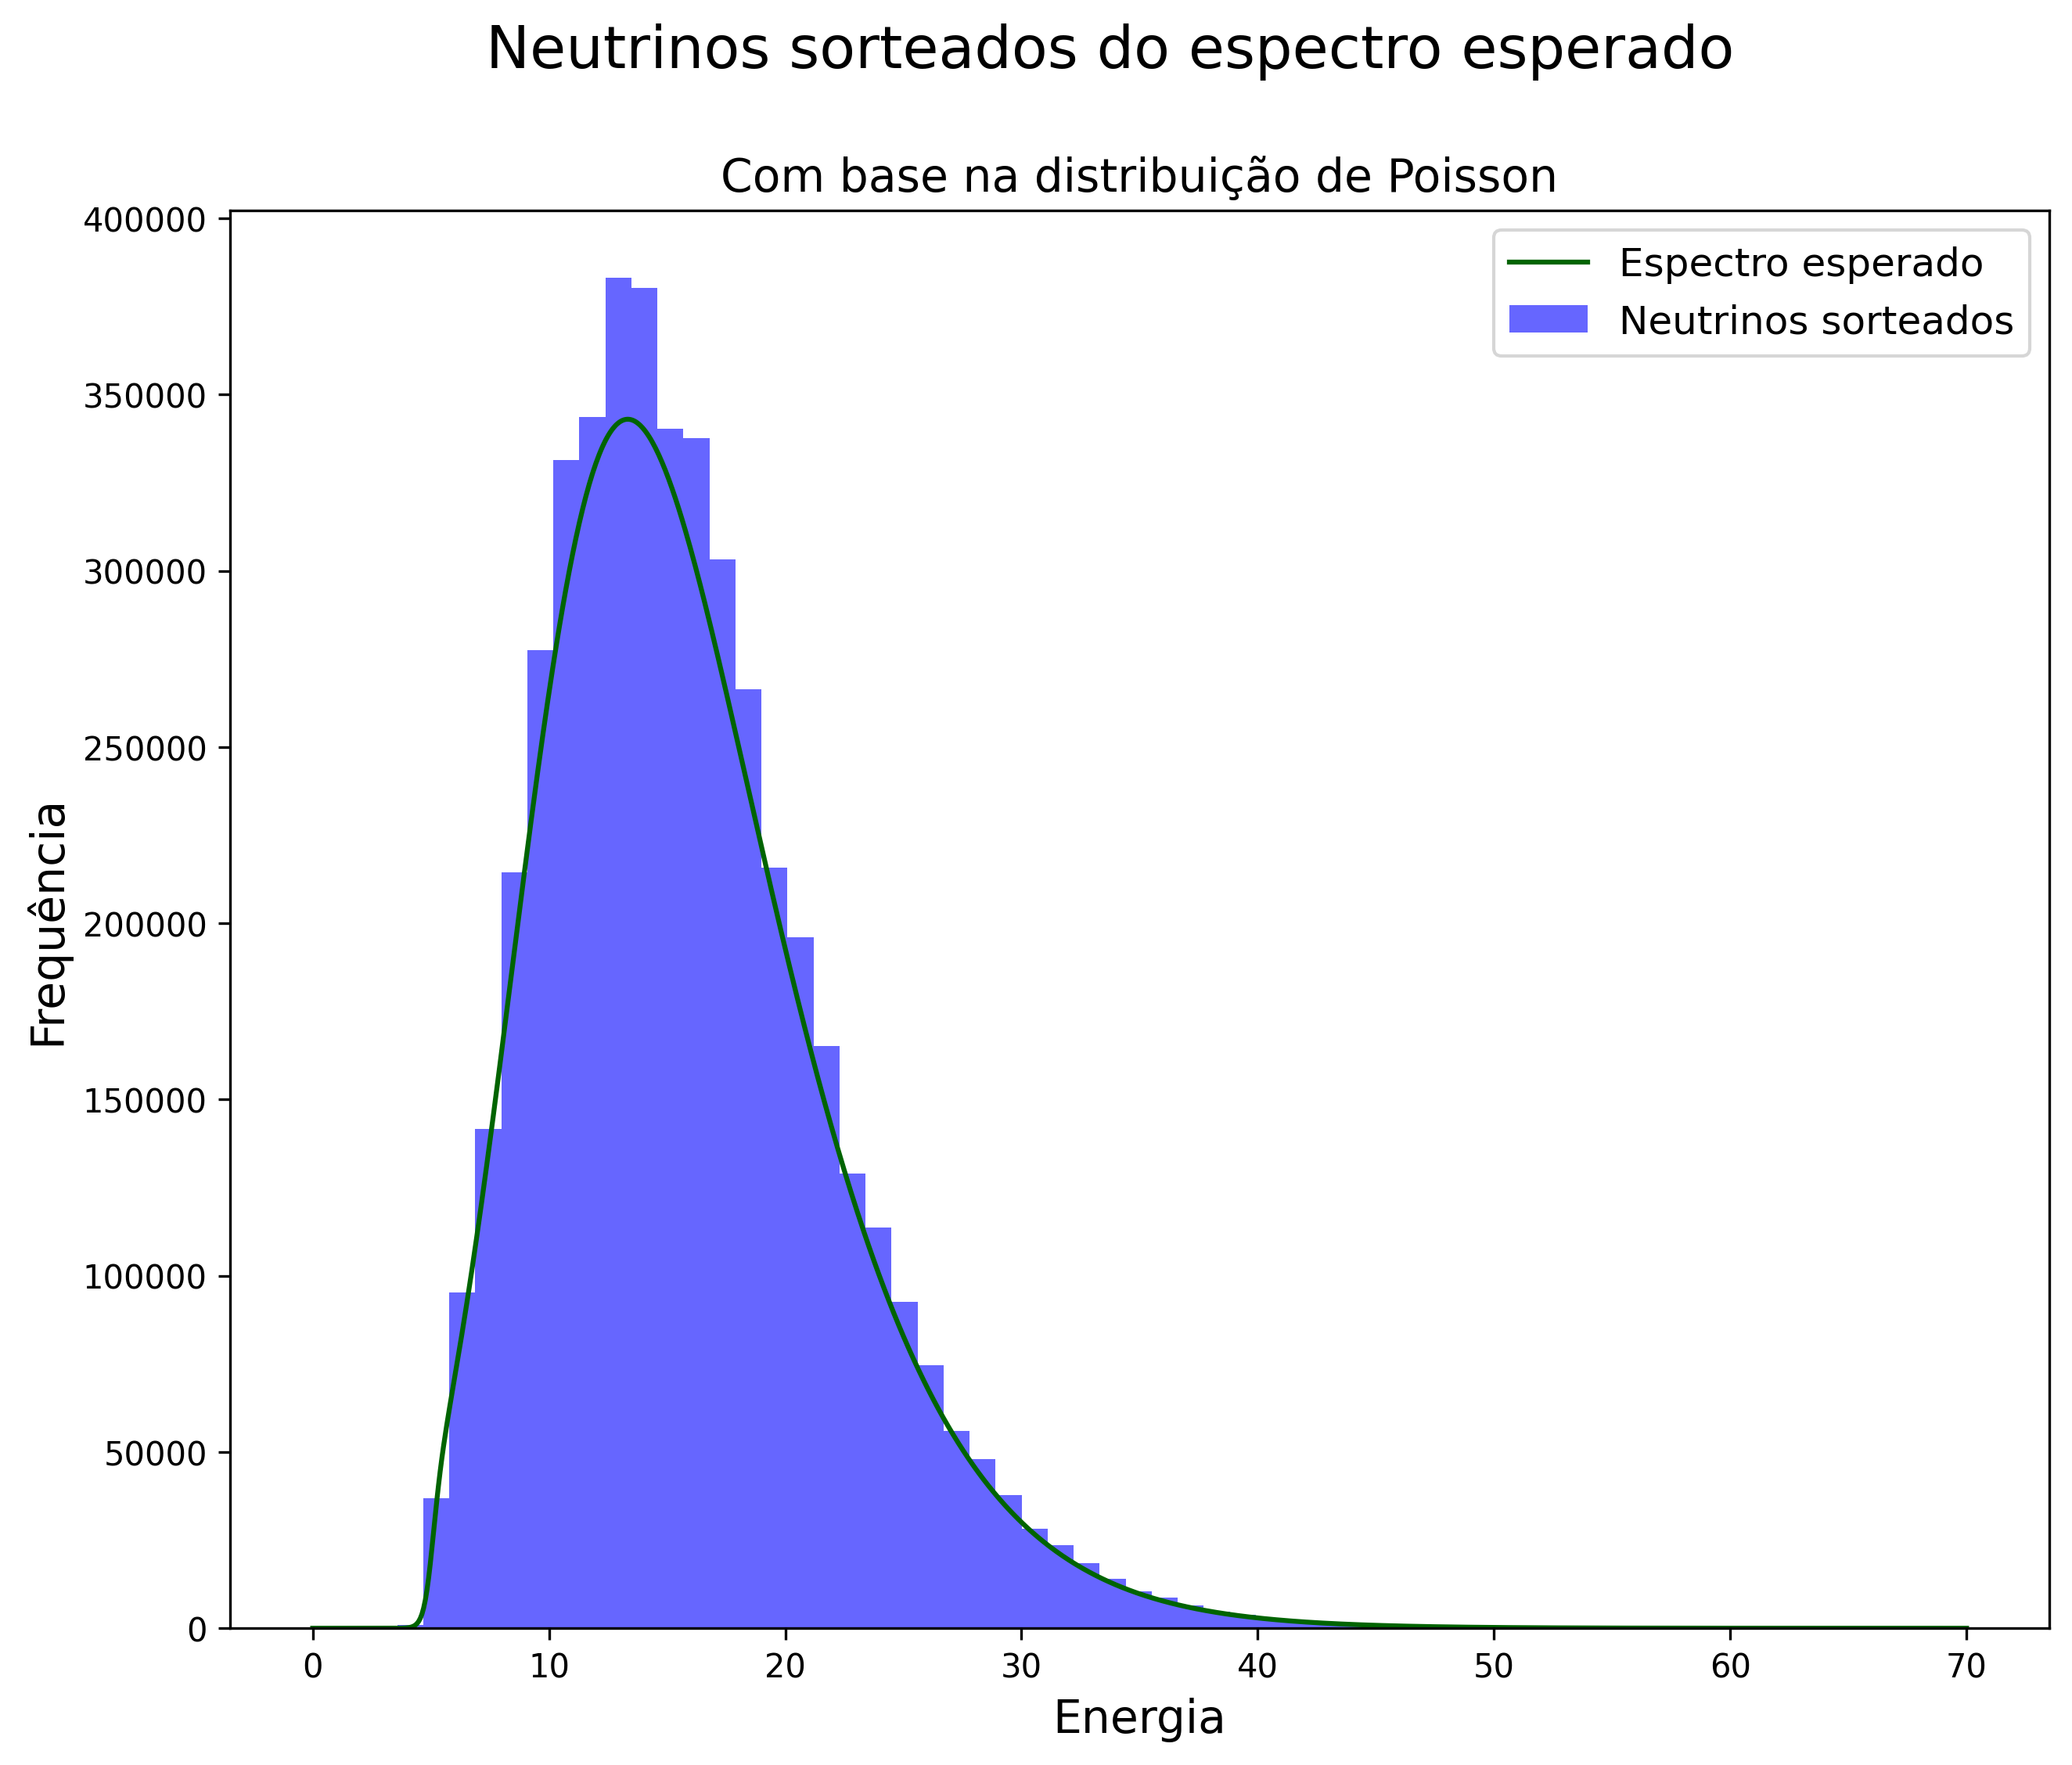

In [8]:
ref_samples = []
population = E
weights = detec(E, 30, 3)
ref_samples = choices(population, weights, k = ref)

plt.figure(figsize=(10,8), dpi = 300)
plt.hist(ref_samples, bins = 60, color = 'blue', alpha = 0.6, label = 'Neutrinos sorteados')
plt.plot(E, detec(E, 30, 3), color = 'darkgreen', label = 'Espectro esperado')
plt.xlabel('Energia', fontsize = 14)
plt.ylabel('Frequência', fontsize = 14)
plt.suptitle('Neutrinos sorteados do espectro esperado', fontsize = 18)
plt.title('Com base na distribuição de Poisson', fontsize = 14)
plt.legend(fontsize=12)
#plt.ylim(0,11000)

In [9]:
new_sample = []
for i in range(len(ref_samples)):
    value = np.random.normal(ref_samples[i],scale=0.05*np.asarray(ref_samples[i]))
    new_sample.append(value)

In [10]:
len(new_sample)

4711252

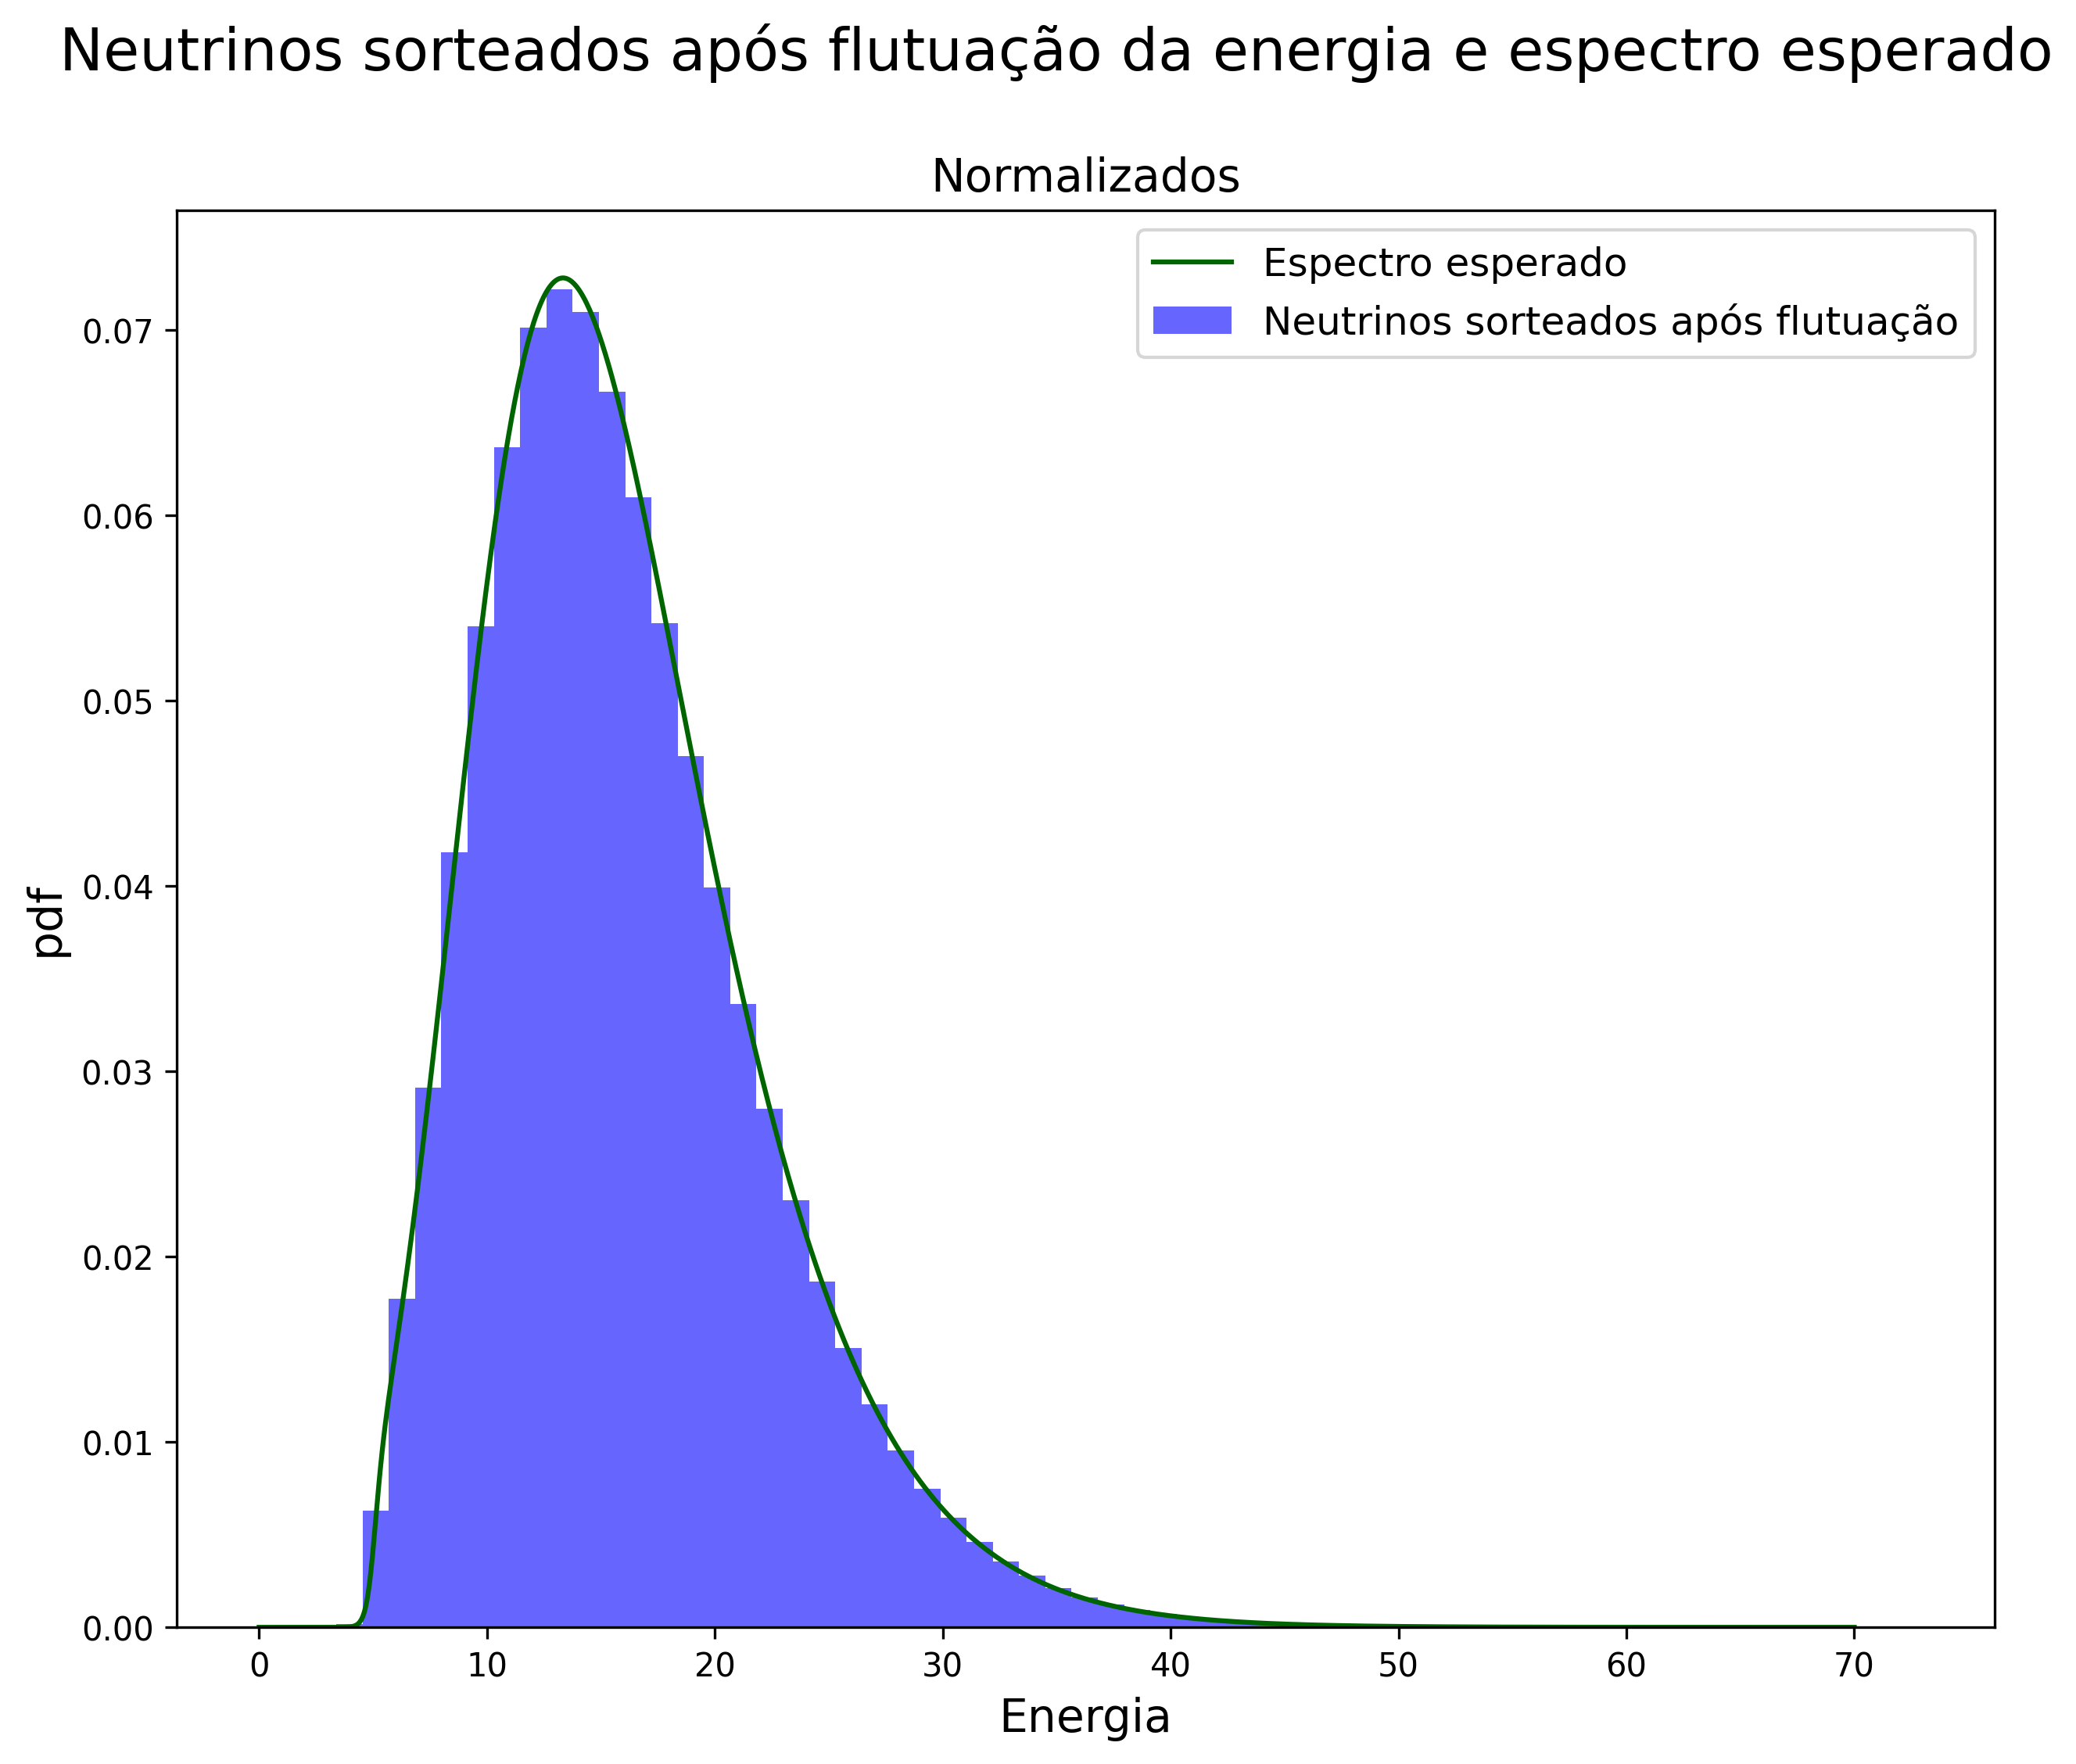

In [11]:
plt.figure(figsize = (10,8), dpi = 300)
plt.hist(new_sample, bins = 60, density = True, color = 'blue', alpha = 0.6, label = 'Neutrinos sorteados após flutuação')
plt.plot(E, detec(E, 30, 3)/ref, color = 'darkgreen', label = 'Espectro esperado')
plt.xlabel('Energia', fontsize = 14)
plt.ylabel('pdf', fontsize = 14)
plt.suptitle('Neutrinos sorteados após flutuação da energia e espectro esperado', fontsize = 18)
plt.title('Normalizados', fontsize = 14)
plt.legend(fontsize = 12)

In [12]:
prior_params = np.array([[20,40],[0,5]], dtype=np.float64)
Dados, E2 = np.histogram(new_sample, bins = 60, density = True)
E2 = (E2[:-1]+E2[1:])/2

In [13]:
def rejABC(prior_params, eps, n_sample):
    # prior_params: list of ranges for uniform priors;
    # eps: tolerance;
    # n_sample: number of samples to be sorted
    
    n_mp = len(prior_params) # Number of model parameters to be fit
    
    p = np.zeros(n_mp+1, dtype=np.float64) # Array of parameters
    
    post = np.zeros((1,n_mp+1)) # Array to build posterior distribution
    
    for i in range(n_sample):
        
        # Sort parameters according to given priors
        for j in range(n_mp):
        
            p[j] = np.random.uniform(prior_params[j,0], prior_params[j,1])
        
        d = np.sqrt(np.sum((Dados-detec(E2, *p[:-1])/ref)**2))/len(E2)
        p[-1] = d # Model-data distance
        
        # Check parameters and add sample to posterior distribution
        if (d < eps):
        
            post = np.concatenate((post, p.reshape((1,n_mp+1)))).reshape(len(post)+1, n_mp+1)
    
    return post[1:]

In [ ]:
post = rejABC(prior_params, 0.1, 1000000)

In [33]:
def sort(n, hist, bins): 
    # n: how many numbers to sort;
    # hist: l-sized array with height of columns of normalized histogram;
    # bins: (l+1)-sized array with values of bins divisions
    
    d = bins[1] - bins[0] # Bin size
    
    dat = [] # List of sorted random numbers
    
    for i in range(n):
        
        x = np.random.uniform(0., 1.)
        
        # Conversion of 0-1 random number to number sorted according to the given histogram
        for j in range(len(hist)):
            
            if (x < np.sum(hist[:j+1])*d):
                
                dat.append(np.random.uniform(bins[j], bins[j+1]))
                break
    
    return np.array(dat) # Converts list of sorted random numbers to numpy array

In [34]:
def smcABC(model, hist, bins, n_bins, p_std, eps, n_sample, n_max):
    # model: function to be fit; 
    # hist+bins: past posterior for new prior
    # n_bins: number of bins to be used to make new prior from last posterior
    # p_std: standard deviations of last posterior, to add noise to new posterior
    # eps: tolerance;
    # n_sample: number of samples to be sorted
    
    n_mp = len(hist) # Number of model parameters to be fit
    
    p = np.zeros(n_mp+1, dtype=np.float64) # Array of parameters
    
    post = np.zeros((1,n_mp+1)) # Array to build posterior distribution
    
    for i in range(n_sample):
        
        # Sort parameters according to given priors
        for j in range(n_mp):
        
            # p[j] = np.random.uniform(prior_params[j,0], prior_params[j,1])
            p[j] = sort(1, hist[j], bins[j]) + np.random.normal(scale=p_std[j]/n_bins)
        
        d = np.sqrt(np.sum((Dados-detec(E2, *p[:-1])/ref)**2))/len(E2)
        p[-1] = d # Model-data distance
        
        # Check parameters and add sample to posterior distribution
        if (d < eps):
        
            post = np.concatenate((post, p.reshape((1,n_mp+1)))).reshape(len(post)+1, n_mp+1)
            
        if (len(post) > n_max):
            break
            
    return post[1:]

In [ ]:
n_bins = 60

repeat = 100

for l in range(1, repeat):
    p = post[np.where(post[:,-1] == np.min(post[:,-1]))[0][0]][:-1]
    p_std = np.std(post[:,:-1], axis=0) # Parameter error as standard deviation of posterior
    
    hist = np.zeros((len(p), n_bins))
    bins = np.zeros((len(p), n_bins+1))
    
    # Define new priors
    for k in range(len(hist)):
        hist[k], bins[k] = np.histogram(post[:, k], n_bins, density=True)
    eps = max(np.max(post[:,-1])*0.75, np.min(post[:,-1])*1.25)
    post_ = smcABC(detec(E2, *p), hist, bins, n_bins, p_std, eps, 100000, 10000)

In [ ]:
p = post_[np.where(post_[:,-1] == np.min(post_[:,-1]))[0][0]][:-1]
p_std = np.std(post_[:,:-1], axis=0)

T = post_[:,0]
eta = post_[:,1]

print('Valor para T: %3.2f' % p[0], '95% CDI:', np.percentile(T, 2.5), '-', np.percentile(T, 97.5))
print('Valor para eta: %3.2f' % p[1], '95% CDI:', np.percentile(eta, 2.5), '-', np.percentile(eta, 97.5))

In [ ]:
sns.distplot(post_[:,0])

In [ ]:
sns.distplot(post_[:,1])

In [ ]:
ax = sns.jointplot(*post_[:,:2].T, kind = 'kde')
#sns.scatterplot(data=true, x = 5,y = 1)
ax.set_axis_labels('T', '$\eta$')
#ax.set_xlim(4, 6)
#ax.set_ylim(0, 2)

In [ ]:
plt.figure(figsize=(10,8), dpi = 300)
cs = plt.hexbin(T, eta, C=post[:,2], gridsize=50, cmap=plt.cm.jet, bins=None)
plt.colorbar(cs, label = 'Distance')
plt.scatter(5, 1, color = 'orange', label = 'Valores reais')
plt.scatter(p[0], p[1], color = 'magenta', label = 'Valores encontrados')
plt.xlabel('T', fontsize = 14)
plt.ylabel('$\eta$', fontsize = 14)
#plt.xlim(4.25, 6)
#plt.ylim(0.5, 1.3)
plt.title('Distribuição de parâmetros encontrados', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 14)

In [ ]:
KS = []
pvalue = []

for i in range(len(post)):
    T0 = post[i,0]
    eta0 = post[i,1]
    K = stats.ks_2samp(detec(E2, T0, eta0)/ref, Dados)
    KS.append(K[0])
    pvalue.append(K[1])

In [ ]:
plt.figure(figsize=(10,8))
#plt.rc('text', usetex = True)
#plt.rc('font', family ='serif')
cs = plt.hexbin(T, eta, C=pvalue, gridsize=80, cmap=plt.cm.jet, bins=None)
plt.colorbar(cs, label = 'p-value')
plt.scatter(5, 1, color = 'black', label = 'Valores reais')
plt.xlabel('T', fontsize = 12)
plt.ylabel('eta', fontsize = 12)
#plt.xlim(4.25, 6)
#plt.ylim(0.5, 1.3)
plt.title('Parâmetros T e eta para a supernova', fontsize = 14)
plt.legend()

In [ ]:
T_best = p[0]
eta_best = p[1]

def detec2(E, d):
    epsilon = 1/(1+np.exp(-5*(E-5))) #Detector efficiency
    Nt = 6e6 #Number of target particles in the detector
    D = Nt/(4*np.pi*d**2)
    return spec(E, T_best, eta_best)*sigma(E, 0, 1/2, 1/2)*epsilon*D

In [ ]:
prior = np.array([[40*10**3,60*10**3]], dtype=np.float64)

In [ ]:
def rejABC(prior_params, eps, n_sample):
    # prior_params: list of ranges for uniform priors;
    # eps: tolerance;
    # n_sample: number of samples to be sorted
    
    n_mp = len(prior_params) # Number of model parameters to be fit
    
    p = np.zeros(n_mp+1, dtype=np.float64) # Array of parameters
    
    post = np.zeros((1,n_mp+1)) # Array to build posterior distribution
    
    for i in range(n_sample):
        
        # Sort parameters according to given priors
        for j in range(n_mp):
        
            p[j] = np.random.uniform(prior_params[j,0], prior_params[j,1])
        
        d = np.abs(ref - simps(detec2(E, *p[:-1]), E))
        p[-1] = d # Model-data distance
        
        # Check parameters and add sample to posterior distribution
        if (d < eps):
        
            post = np.concatenate((post, p.reshape((1,n_mp+1)))).reshape(len(post)+1, n_mp+1)
    
    return post[1:]

In [ ]:
D = rejABC(prior, 10, 1000000)

In [ ]:
sns.distplot(D[:,0])

In [ ]:
def sort(n, hist, bins): 
    # n: how many numbers to sort;
    # hist: l-sized array with height of columns of normalized histogram;
    # bins: (l+1)-sized array with values of bins divisions
    
    d = bins[1] - bins[0] # Bin size
    
    dat = [] # List of sorted random numbers
    
    for i in range(n):
        
        x = np.random.uniform(0., 1.)
        
        # Conversion of 0-1 random number to number sorted according to the given histogram
        for j in range(len(hist)):
            
            if (x < np.sum(hist[:j+1])*d):
                
                dat.append(np.random.uniform(bins[j], bins[j+1]))
                break
    
    return np.array(dat) # Converts list of sorted random numbers to numpy array

In [ ]:
def smcABC(model, hist, bins, n_bins, p_std, eps, n_sample, n_max):
    # model: function to be fit; 
    # hist+bins: past posterior for new prior
    # n_bins: number of bins to be used to make new prior from last posterior
    # p_std: standard deviations of last posterior, to add noise to new posterior
    # eps: tolerance;
    # n_sample: number of samples to be sorted
    
    n_mp = len(hist) # Number of model parameters to be fit
    
    p = np.zeros(n_mp+1, dtype=np.float64) # Array of parameters
    
    post = np.zeros((1,n_mp+1)) # Array to build posterior distribution
    
    for i in range(n_sample):
        
        # Sort parameters according to given priors
        for j in range(n_mp):
        
            # p[j] = np.random.uniform(prior_params[j,0], prior_params[j,1])
            p[j] = sort(1, hist[j], bins[j]) + np.random.normal(scale=p_std[j]/n_bins)
        
        d = np.abs(ref - simps(detec2(E, p[:-1]), E))
        p[-1] = d # Model-data distance
        
        # Check parameters and add sample to posterior distribution
        if (d < eps):
        
            post = np.concatenate((post, p.reshape((1,n_mp+1)))).reshape(len(post)+1, n_mp+1)
            
        if (len(post) > n_max):
            break
            
    return post[1:]

In [ ]:
n_bins = 20

repeat = 100

for l in range(1, repeat):
    p = D[np.where(D[:,-1] == np.min(D[:,-1]))[0][0]][:-1]
    p_std = np.std(D[:,:-1], axis=0) # Parameter error as standard deviation of posterior
    
    hist = np.zeros((len(p), n_bins))
    bins = np.zeros((len(p), n_bins+1))
    
    # Define new priors
    for k in range(len(hist)):
        hist[k], bins[k] = np.histogram(D[:, k], n_bins, density=True)
    eps = max(np.max(D[:,-1])*0.75, np.min(D[:,-1])*1.25)
    post_ = smcABC(detec2(E, p), hist, bins, n_bins, p_std, eps, 10000000, 100000)

In [ ]:
sns.distplot(post_)

In [ ]:
d = post_[np.where(post_[:,-1] == np.min(post_[:,-1]))[0][0]][:-1]

print('Distância até a supernova:', d, '95% CDI:', np.percentile(post_, 2.5), '-', np.percentile(post_, 97.5))